In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df=pd.read_csv("data/diabetes.csv")
data_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(data_df.shape)

(768, 9)


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


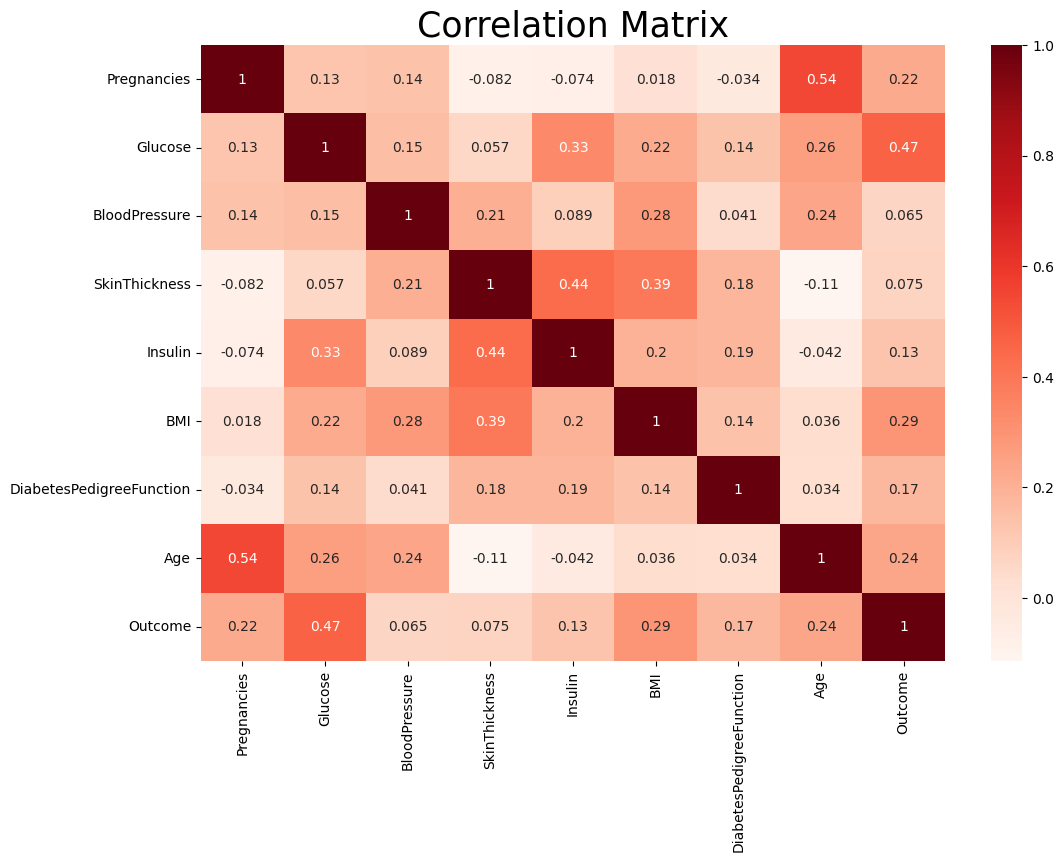

In [6]:
plt.figure(figsize = (12,8))
sns.heatmap(data_df.corr(), annot = True, cmap = "Reds")
plt.title("Correlation Matrix", fontsize = 25);

## Data Cleaning
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin
- BMI

In [7]:
clean_data_df = data_df[
    (data_df['Glucose'] != 0) &
    (data_df['BloodPressure'] != 0) &
    (data_df['SkinThickness'] != 0) &
    (data_df['Insulin'] != 0) &
    (data_df['BMI'] != 0)
]
clean_data_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

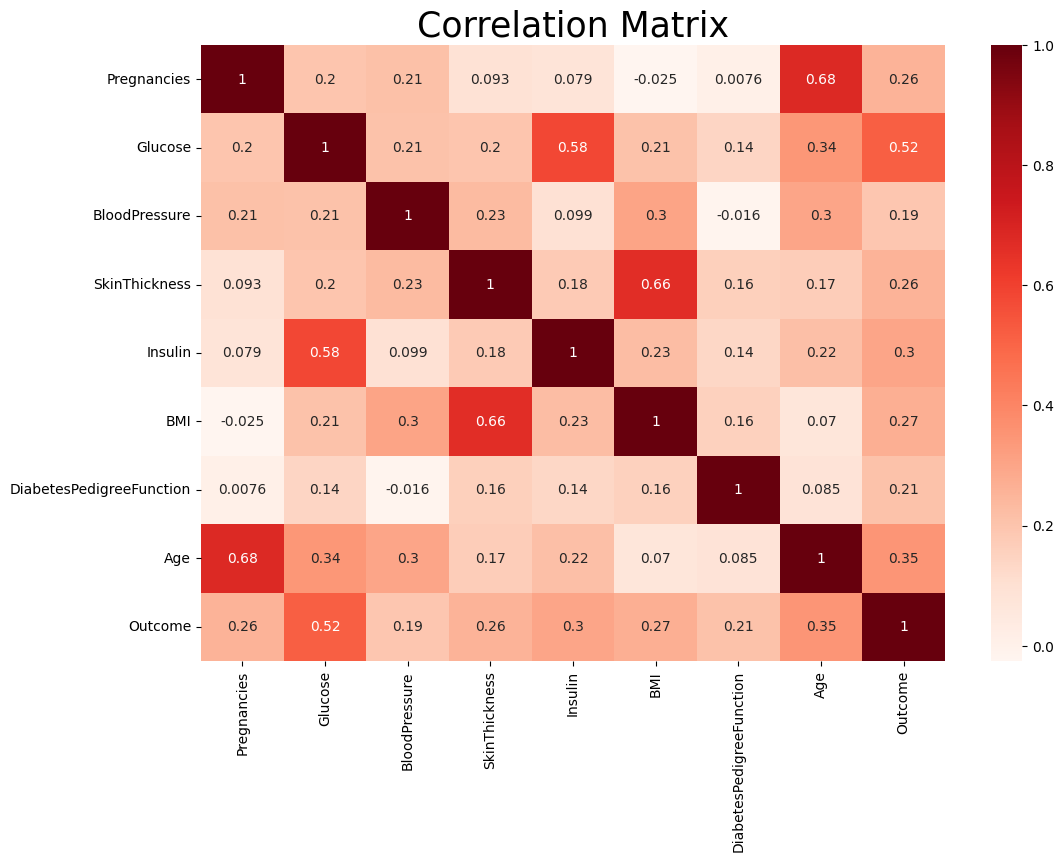

In [8]:
plt.figure(figsize = (12,8))
sns.heatmap(clean_data_df.corr(), annot = True, cmap = "Reds")
plt.title("Correlation Matrix", fontsize = 25)

In [9]:
def set_style(ax, left=True, bottom=False, axis_grid="y"):
    sns.despine(ax=ax, left=left, bottom=bottom)
    ax.grid(axis=axis_grid, linewidth=0.2, color="black")

def kde(data, column, ax, color=None, meanline_color=None, hue=None, hue_colors=None, title=None):

    sns.kdeplot(data=data, x=column, ax=ax,
        fill=True, linewidth=2, color=color, hue=hue, palette=hue_colors)
    
    if not hue:
        ax.axvline(np.mean(data[column]), linestyle='--', color=meanline_color, linewidth=2)
    else:
        for i, value in enumerate(data[hue].unique()):
            ax.axvline(np.mean(data[data[hue] == value][column]), linestyle='--', linewidth=2, label=value, color=hue_colors[value])

    ax.set_ylabel("")

    set_style(ax)

def count_values(data, col, ax, color=None):
    data = data[col].value_counts()

    data.index = data.index.map(str)

    ax.bar(x=data.index, height=data.values, 
        linewidth=2, edgecolor='black', color=color, alpha=1)

    labels = [f"{value} | {round(value / sum(data.values) * 100, 1)}%" for value in data.values]
    for container in ax.containers:
        ax.bar_label(container, labels=labels, padding=3, fontsize=15)

    ax.tick_params(axis='y', 
        left=False,  
        right=False, 
        labelleft=False
        )

    ax.set_title(f"Value counts of \"'{col}\" column", fontsize="xx-large")

    set_style(ax)

def cdf(data, col, ax, hue=None, color=None, hue_colors=None):

    sns.kdeplot(data=data, x=col, hue=hue, ax=ax, 
        color=color, palette=hue_colors, 
        cumulative=True, linewidth=3, common_norm=False)
    
    ax.set_ylabel("")

    set_style(ax)


def scatter(data, x, y, ax, hue=None, hue_colors=None, color=None):

    sns.scatterplot(data=data, x=x, y=y, ax=ax, hue=hue, 
        palette=hue_colors, linewidth=1, edgecolor='black', alpha=0.7, style=hue)
    
    ax.set_xlabel(x, fontsize="xx-large")
    ax.set_ylabel(y, fontsize="xx-large")

    set_style(ax)


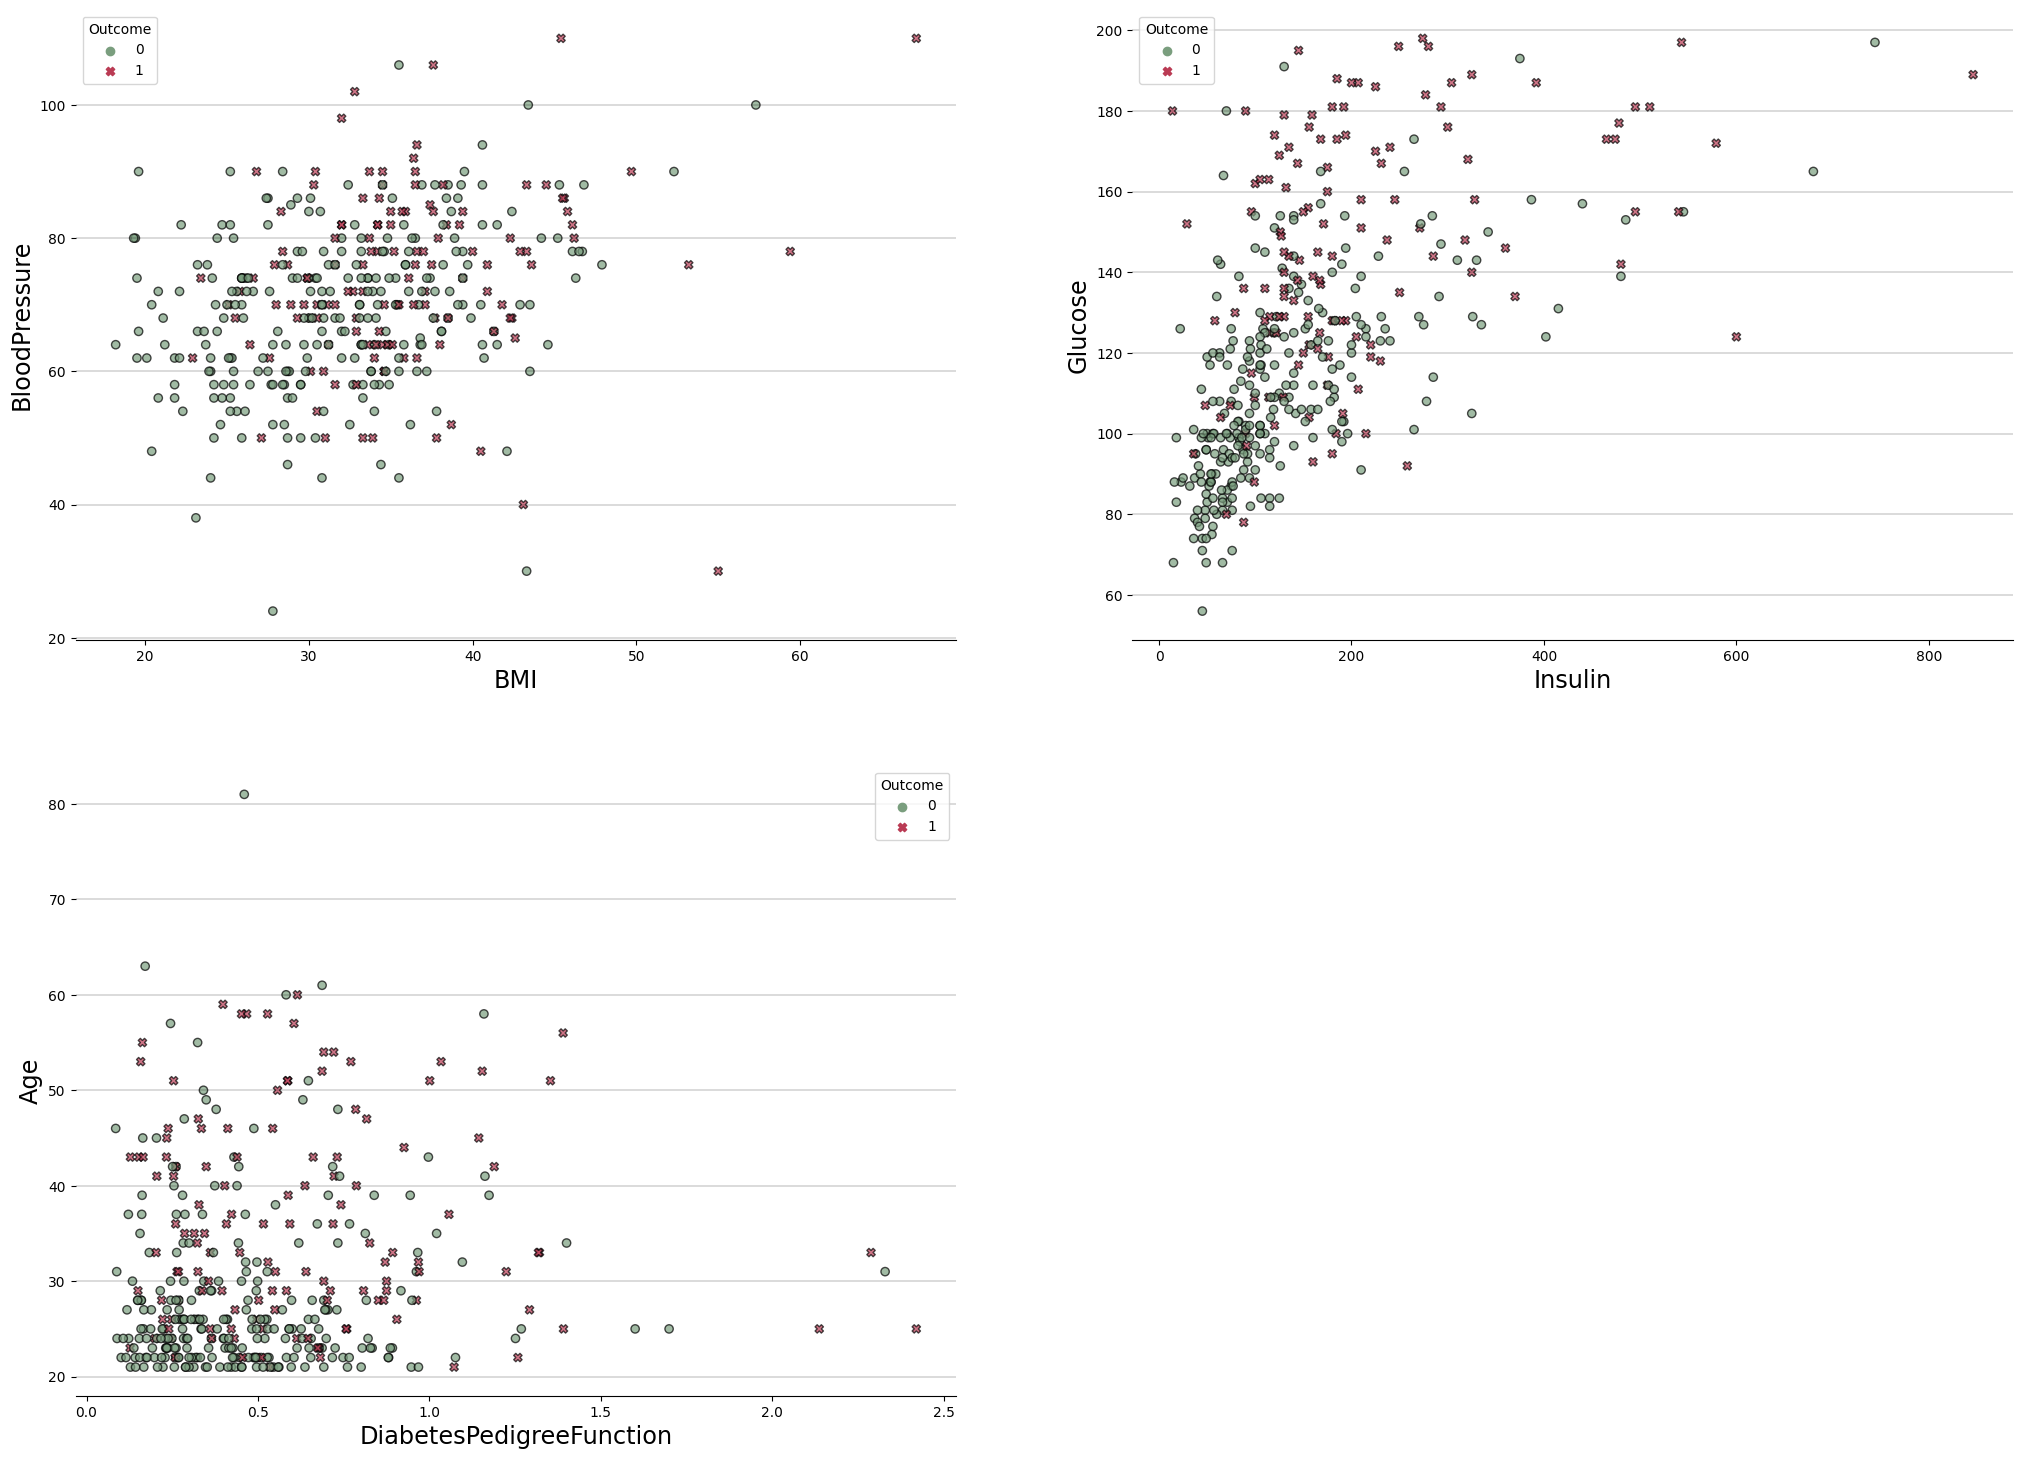

In [10]:
hue_dict = {
    0: "#7A9E7E",
    1: "#BA3B54"
}
fig, axs = plt.subplots(2, 2, figsize=(25, 18))

scatter(clean_data_df, "BMI", "BloodPressure", axs[0][0], hue="Outcome", hue_colors=hue_dict)
scatter(clean_data_df, "Insulin", "Glucose", axs[0][1], hue="Outcome", hue_colors=hue_dict)
scatter(clean_data_df, "DiabetesPedigreeFunction", "Age", axs[1][0], hue="Outcome", hue_colors=hue_dict)

fig.delaxes(axs[1][1])

plt.show()

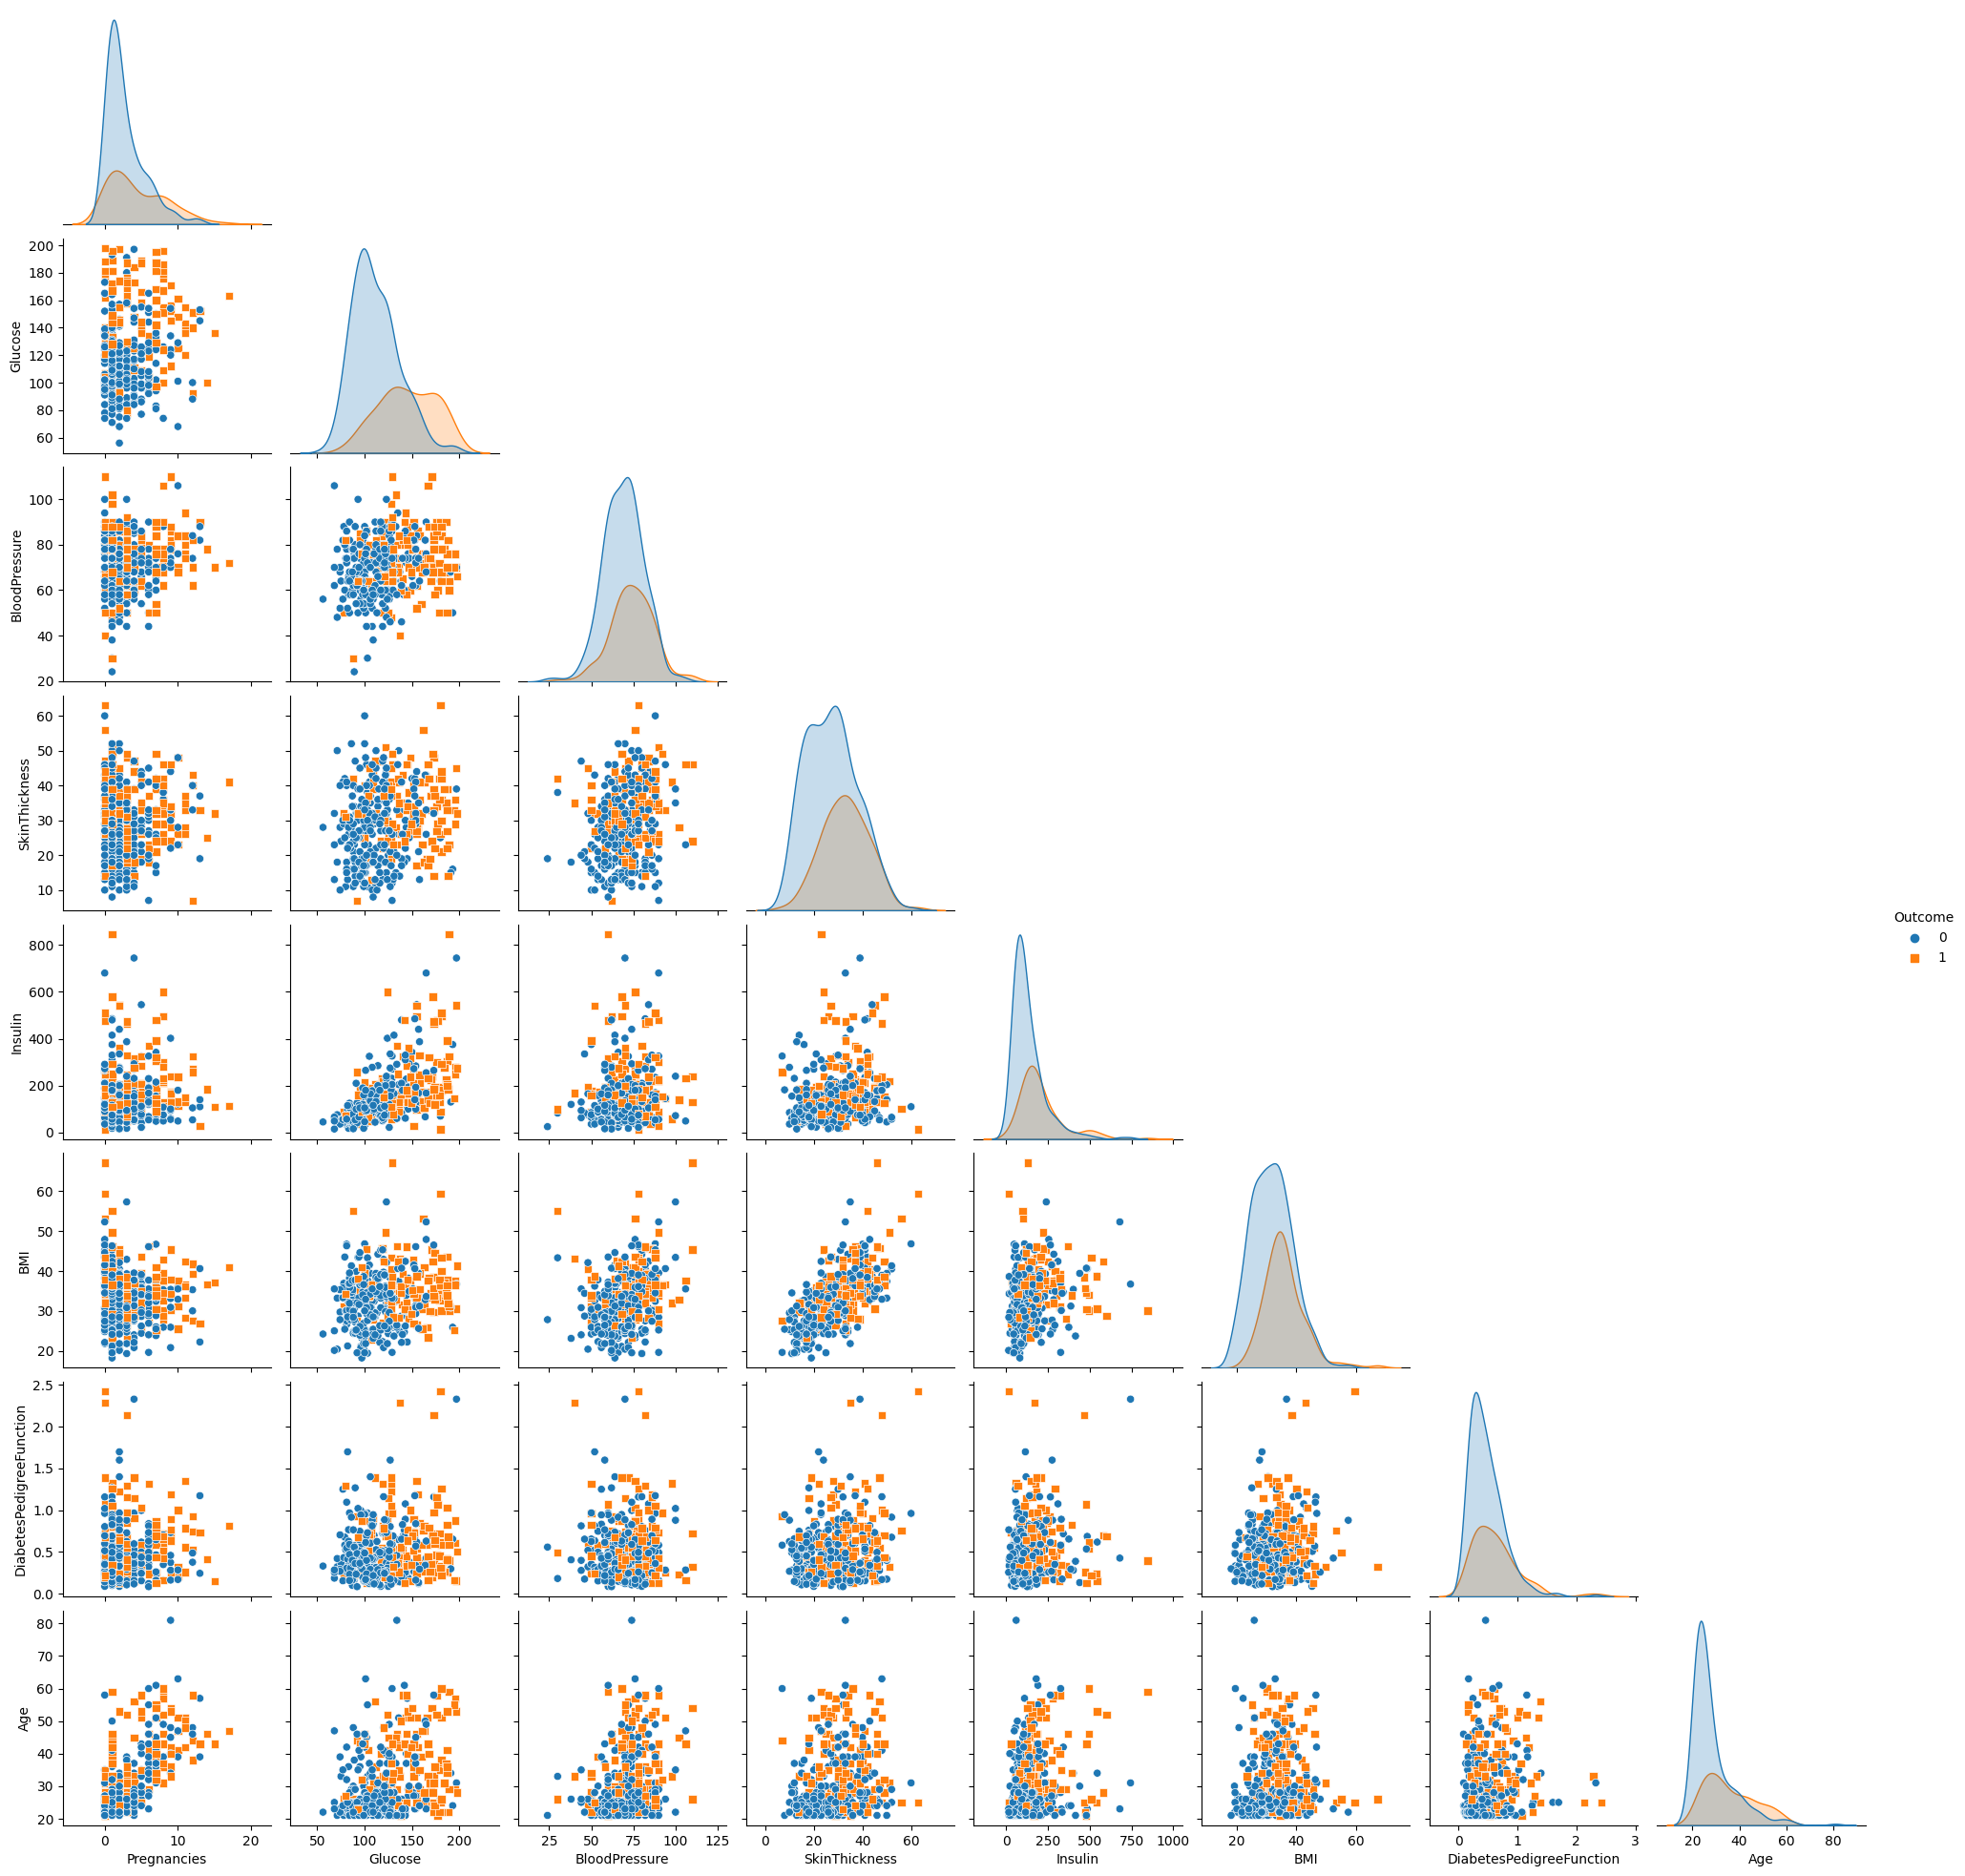

In [11]:
sns.pairplot(clean_data_df, hue="Outcome", markers=["o", "s"], corner=True)

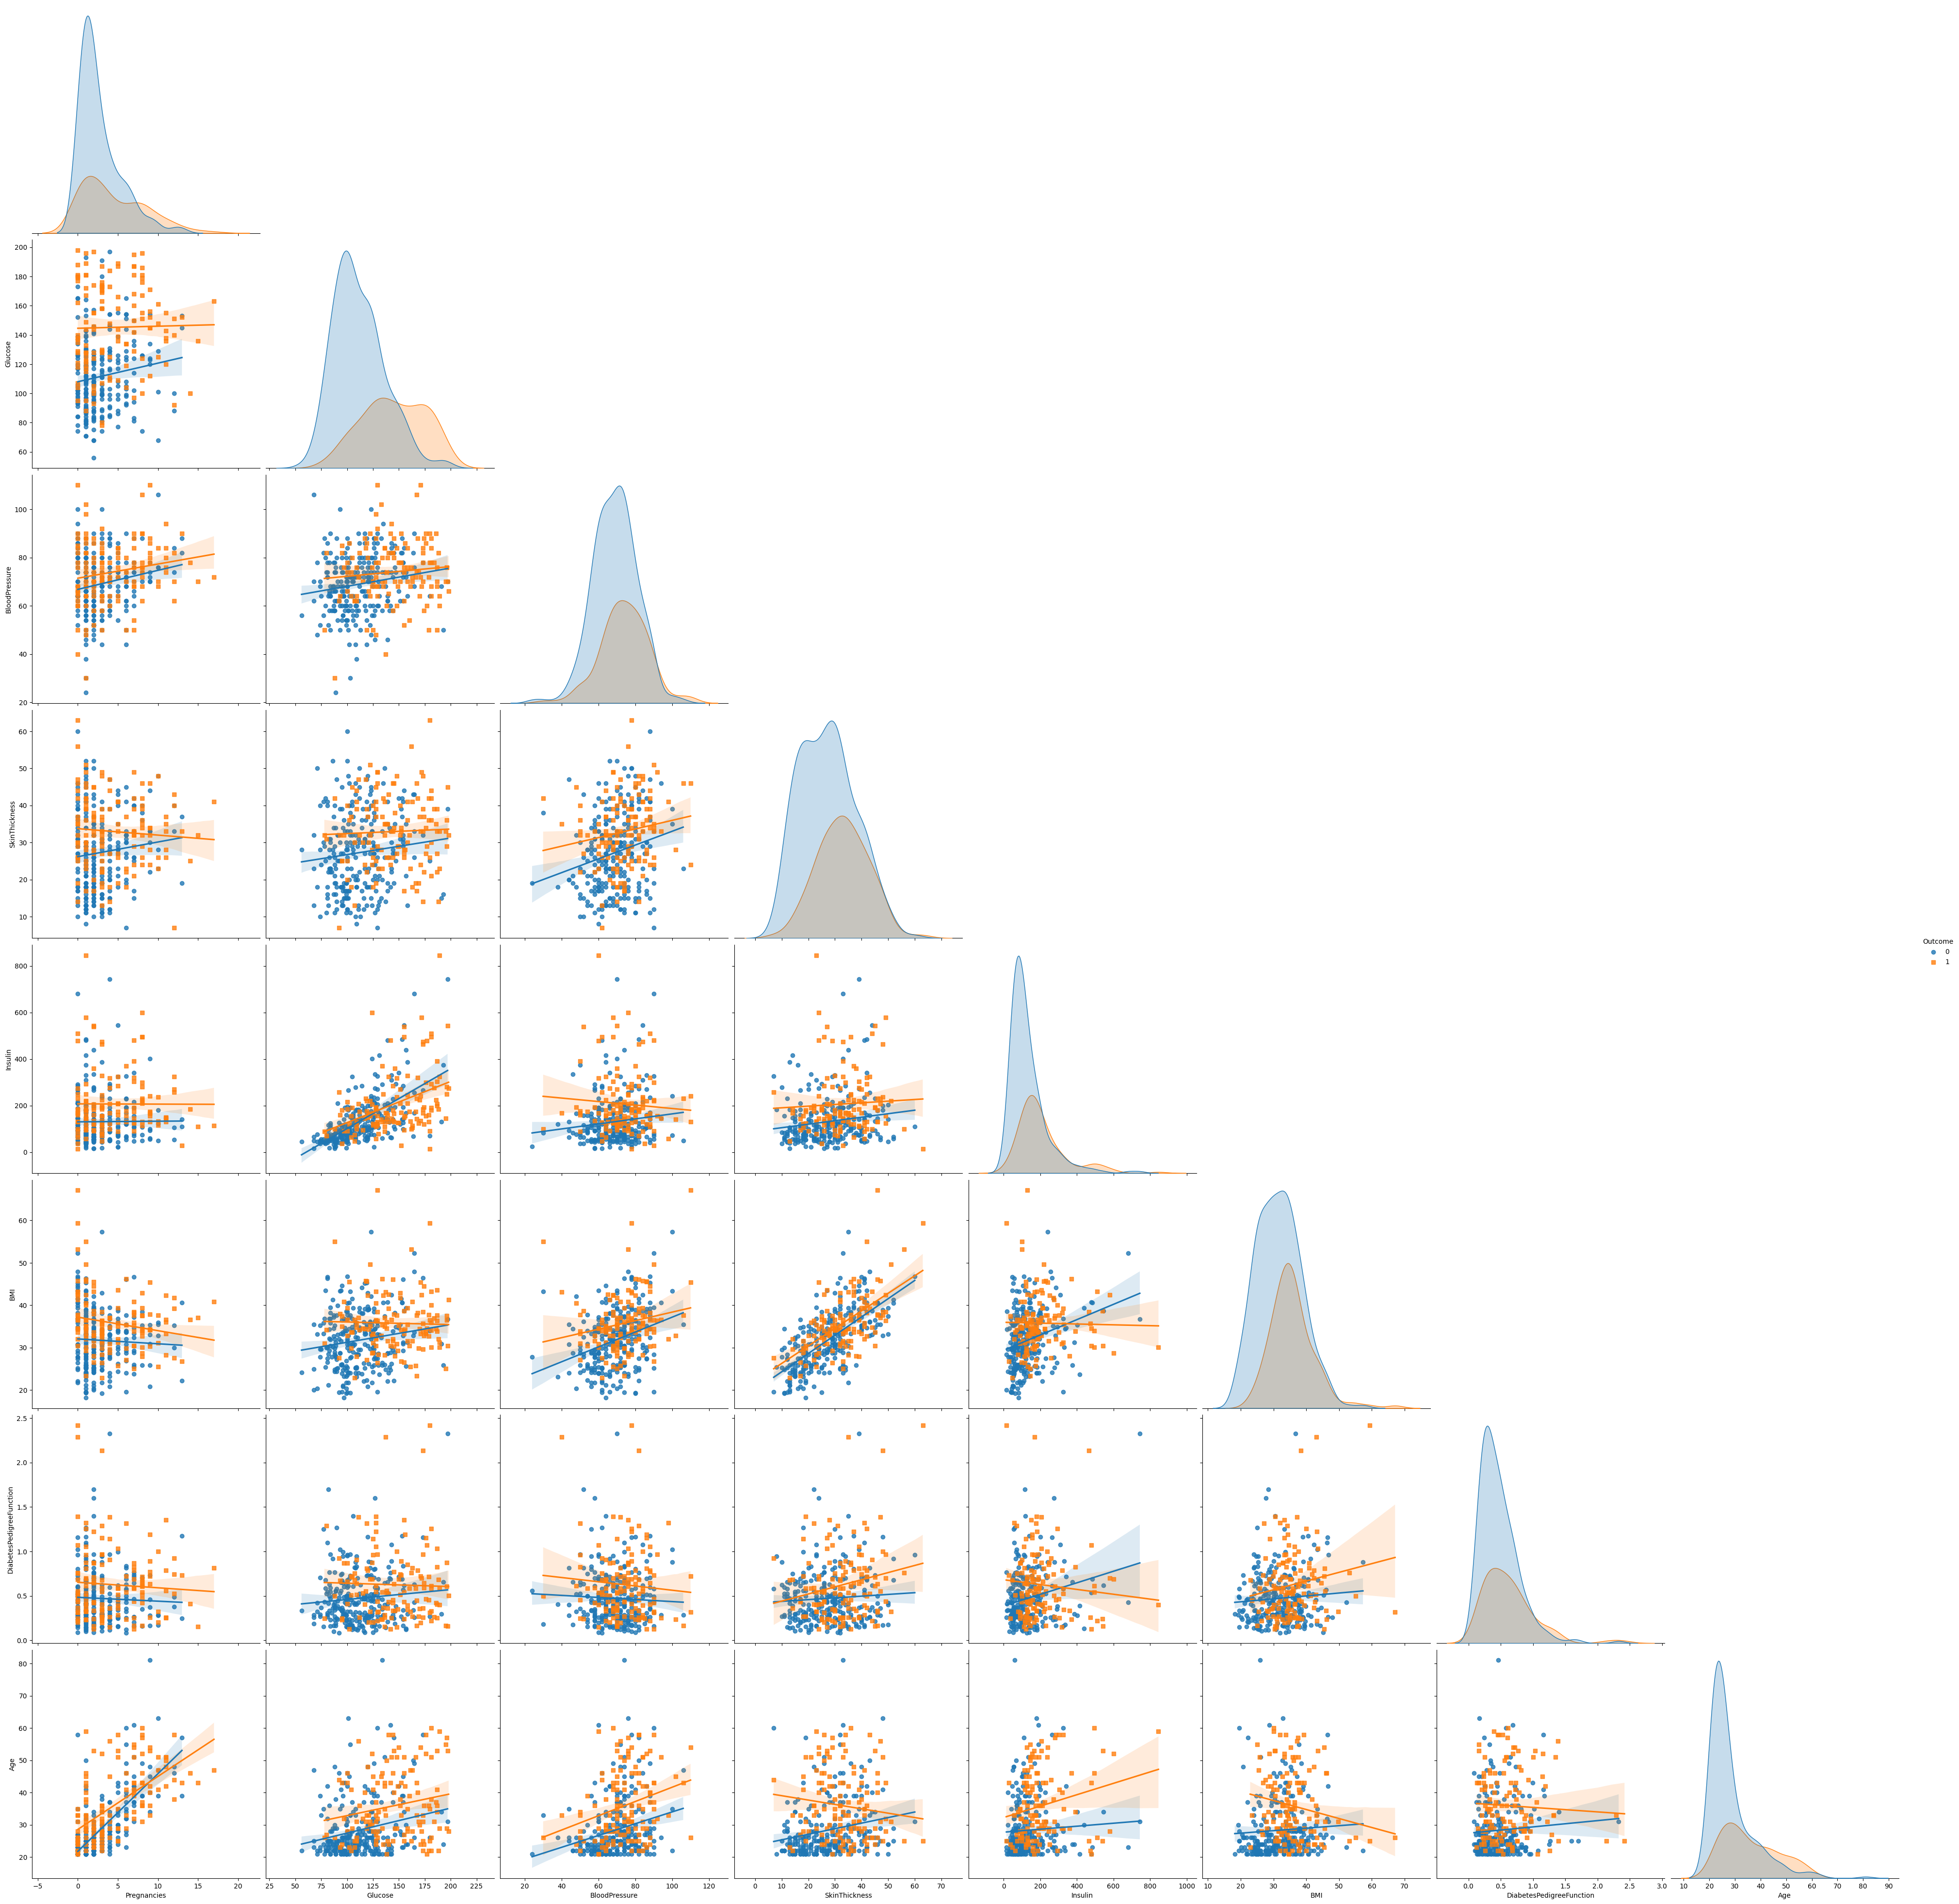

In [12]:
# sns.pairplot(clean_data_df, hue="Outcome", markers=["o", "s"], corner=True, kind='reg', height=5)

## Correlation

In [13]:
sole_pregnancies_df = data_df[['Glucose', 'Outcome']]
print(sole_pregnancies_df.corr())

          Glucose   Outcome
Glucose  1.000000  0.466581
Outcome  0.466581  1.000000


In [14]:
glucose_df = data_df[data_df['Glucose'] != 0]
sole_glucose_df = glucose_df[['Glucose', 'Outcome']]

print(glucose_df.corr()['Glucose'])

Pregnancies                 0.128135
Glucose                     1.000000
BloodPressure               0.158429
SkinThickness               0.075178
Insulin                     0.331550
BMI                         0.235666
DiabetesPedigreeFunction    0.137246
Age                         0.267136
Outcome                     0.494650
Name: Glucose, dtype: float64


In [15]:
import xgboost
from xgboost import XGBClassifier

In [16]:
X_df =  clean_data_df.drop(['Outcome'], axis=1)
Y_df = clean_data_df['Outcome']

# define the model
model = XGBClassifier()
# fit the model
model.fit(X_df, Y_df)
# get importance
feature_importance = model.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5


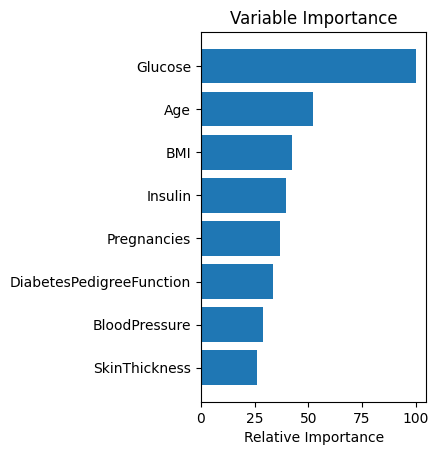

In [17]:
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, clean_data_df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()